In [0]:
!pip install autokeras

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


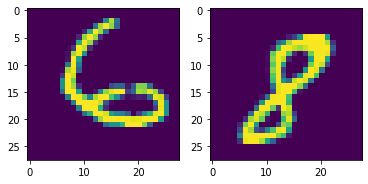

In [3]:
import matplotlib.pyplot as plt
_, canvas = plt.subplots(1,2)
_ = canvas[0].imshow(x_train[4214])#_ to remove <matplotlib.image.AxesImage at 0x7f727fad9860>
_ = canvas[1].imshow(x_train[4275])

<BarContainer object of 10 artists>

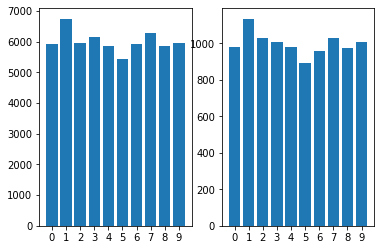

In [4]:
import numpy as np
train_hist = np.histogram(y_train)
test_hist = np.histogram(y_test)

_, canvas = plt.subplots(1,2)
_ = canvas[0].set_xticks(range(10))
canvas[0].bar(range(10), train_hist[0])

_ = canvas[1].set_xticks(range(10))
canvas[1].bar(range(10), test_hist[0])

autokeras will work good as classes are quite evenly distributed

In [5]:
#classfier

from autokeras import ImageClassifier

clf = ImageClassifier(verbose=True)
clf.fit(x_train, y_train, time_limit=20*60) #time_limit is in seconds

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.
Saving Directory: /tmp/autokeras_RMNZHQ
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   0.3612056620419025   |   0.9684000000000001   |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1      

It trys to fit many models within time limit, and att the end it will show us the best one so epoch may also vary</br>Time limit should be such that autokeras can try at least one model

Maybe model 2 would have been better than other two

In [6]:
#test accuracy
eva = clf.evaluate(x_test, y_test)
print(eva)

0.9843


In [0]:
#for predictions simple
clf.predict('image path')